# 위스콘신 유방암 데이터 분류

유방에서 만져지는 덩어리에 대한 세침 흡인 검사(FNA, 유방생검)를 통해 수집된 표본의 세포핵의 특성을 설명하는 데이터를 통해 암이 양성인지 악성인지 예측하기 위한 데이터 셋

> https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

> https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from help_a.util import *
from help_a.plot import *
from help_a.analysis import *
from help_a.classification import *

### [2] 데이터 가져오기

| 변수 | 설명 |
|---|---|
| id | 일련번호
| diagnosis | 유방조직의 진단 (`M`=악성, `B`=양성) |
| 그 밖의 변수 | 종양 세포에 관한 의학적 지표들 |

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/breast-cancer-wisconsin.xlsx", index_col="id", categories=["diagnosis"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  are

## #02. 탐색적 데이터 분석

### [1] 상자그림

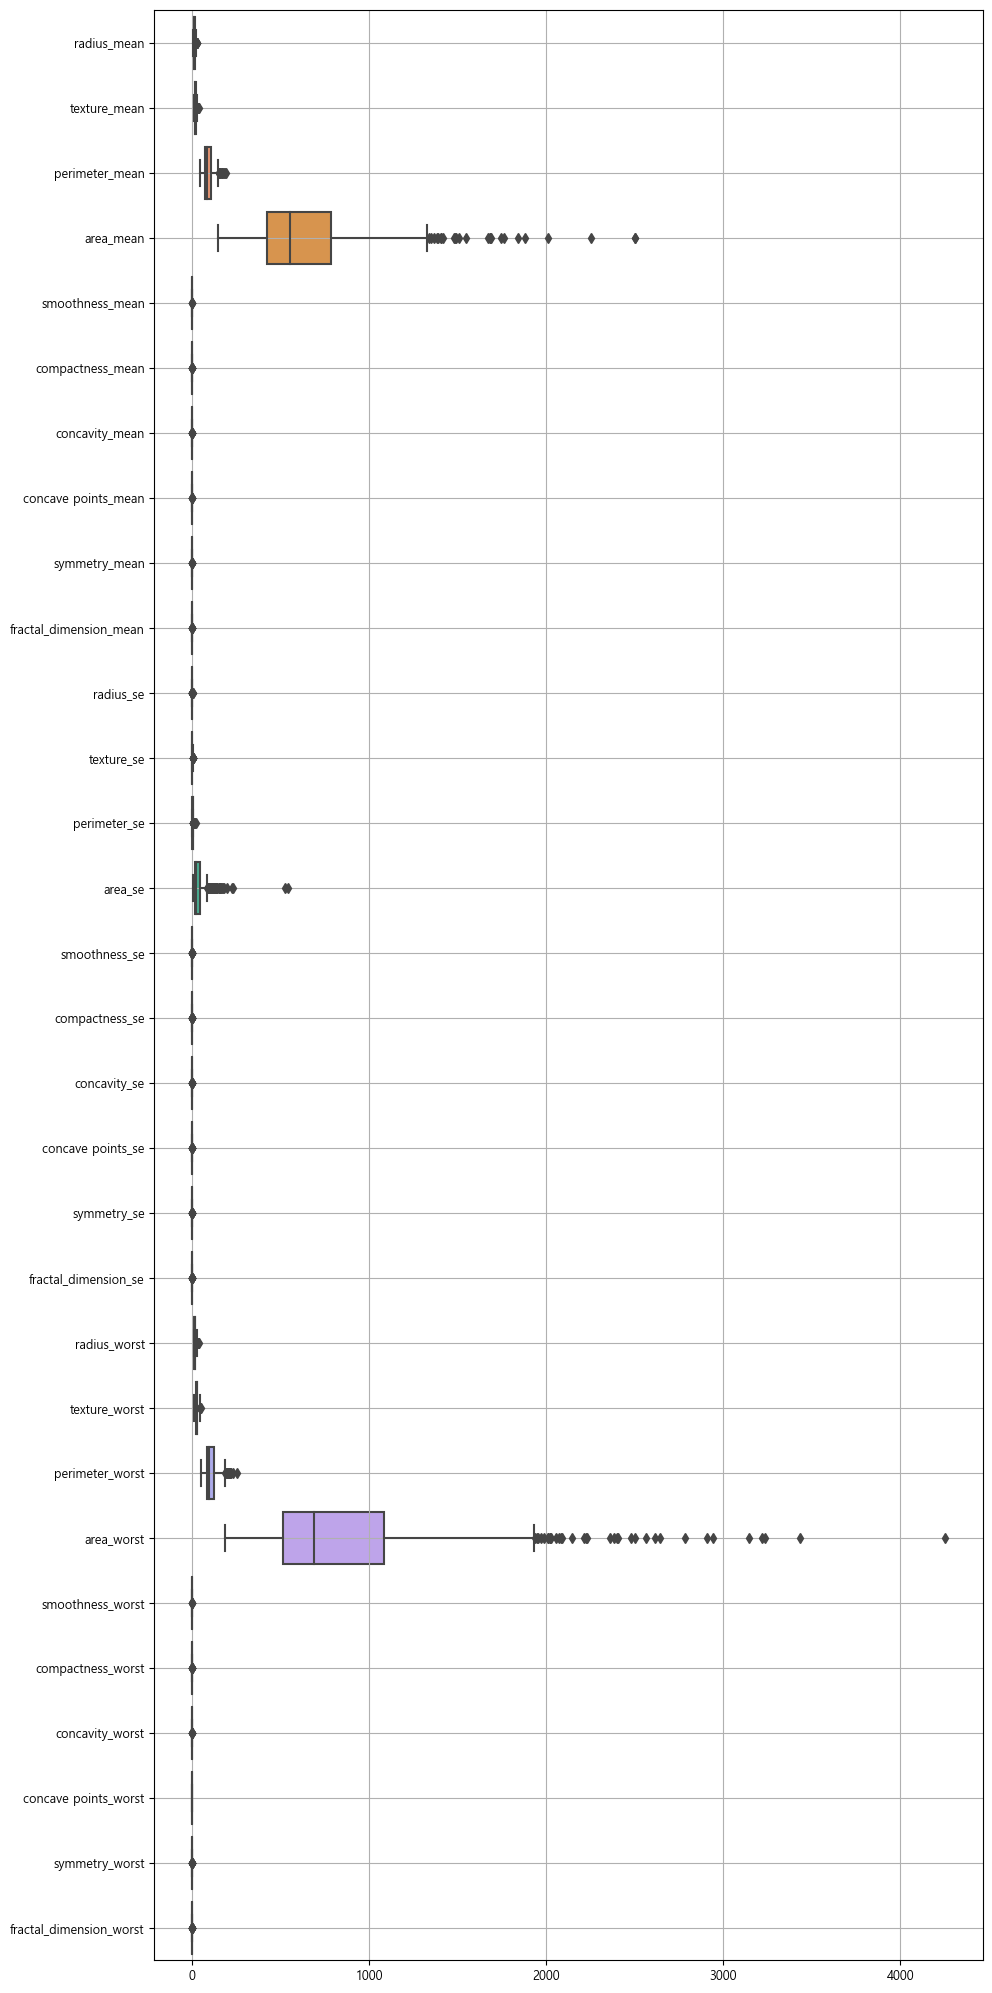

In [3]:
my_boxplot(origin, orient='h', figsize=(10, 20))

> 데이터 스케일링이 필요할 것으로 판단됨

### [2] 종속변수에 따른 데이터 분포 비교

In [4]:
yname = 'diagnosis'
xnames = list(origin.drop(yname, axis=1).columns)

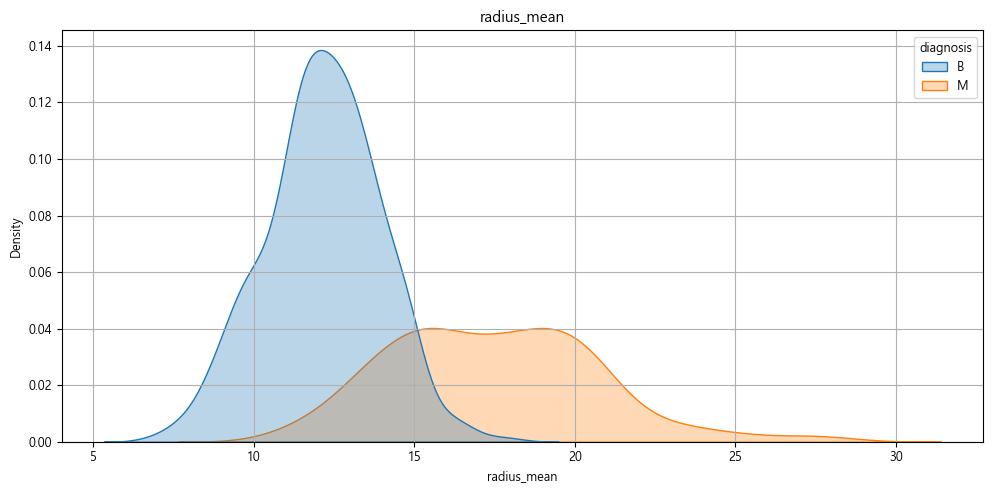

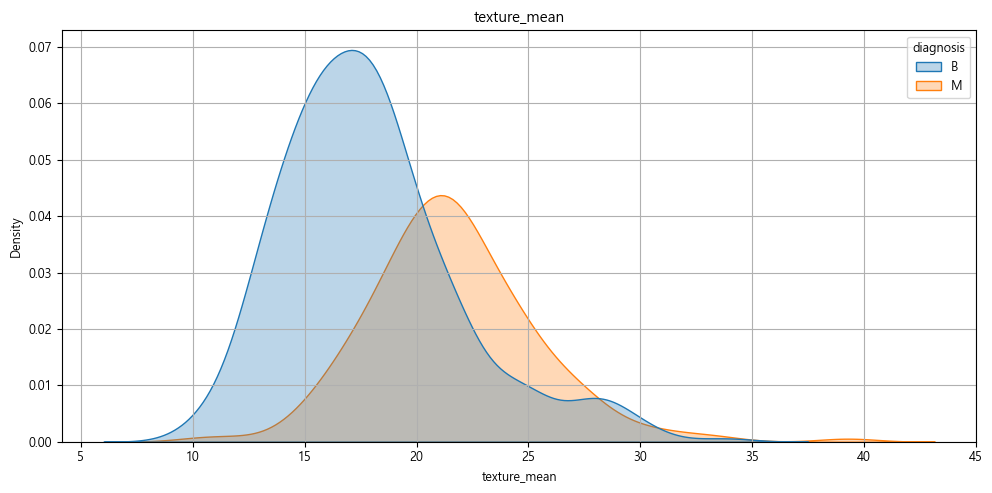

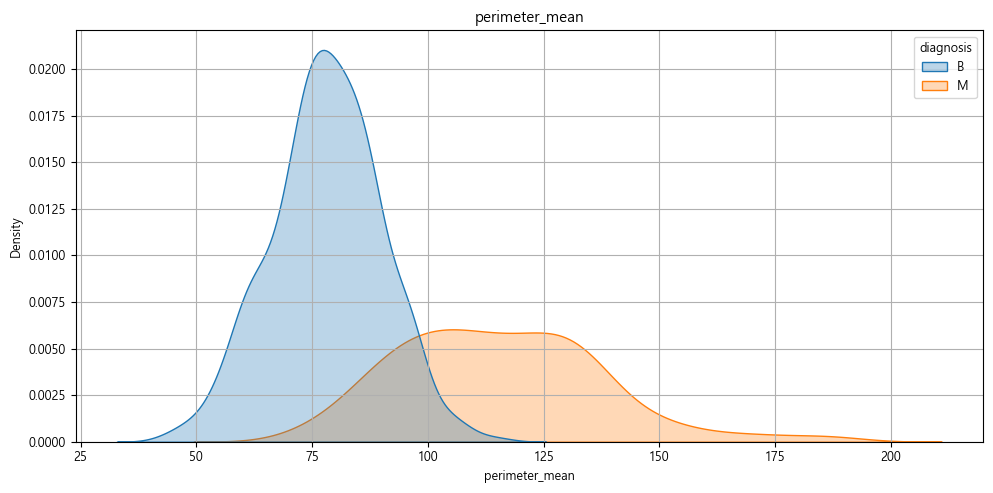

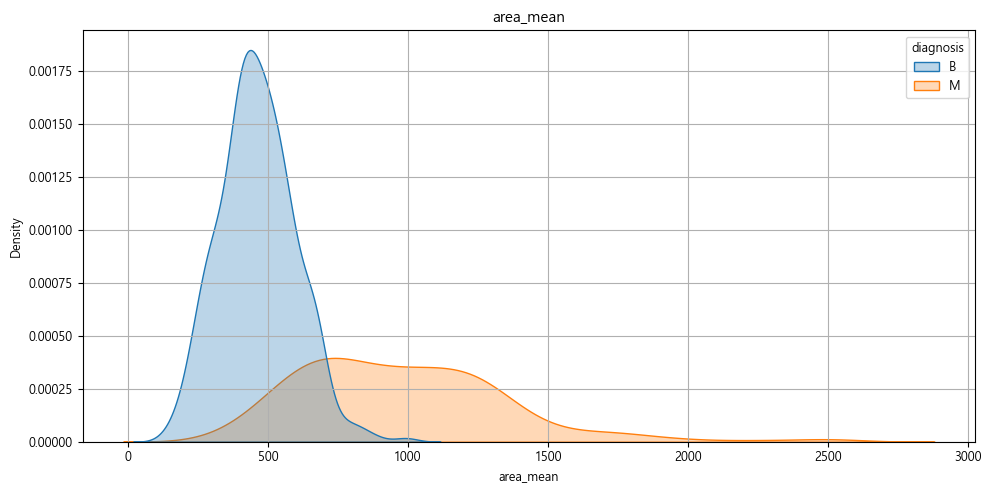

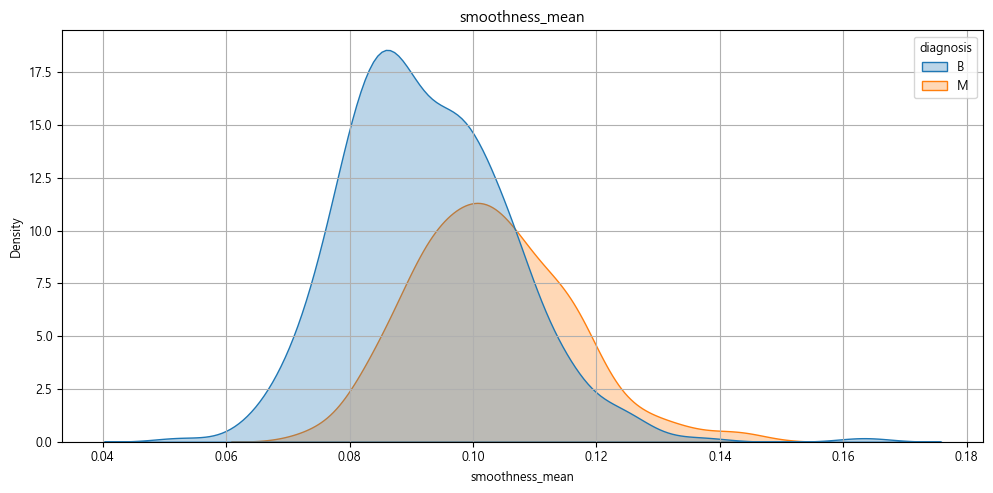

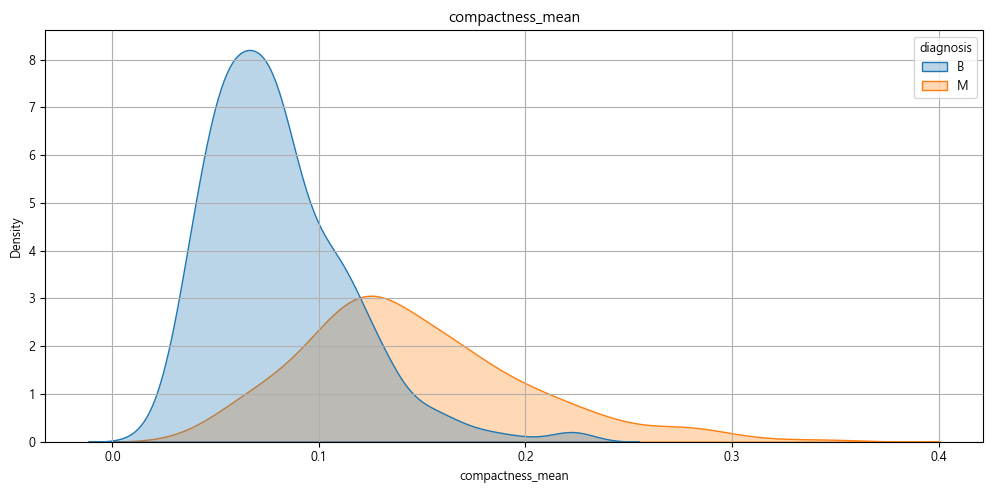

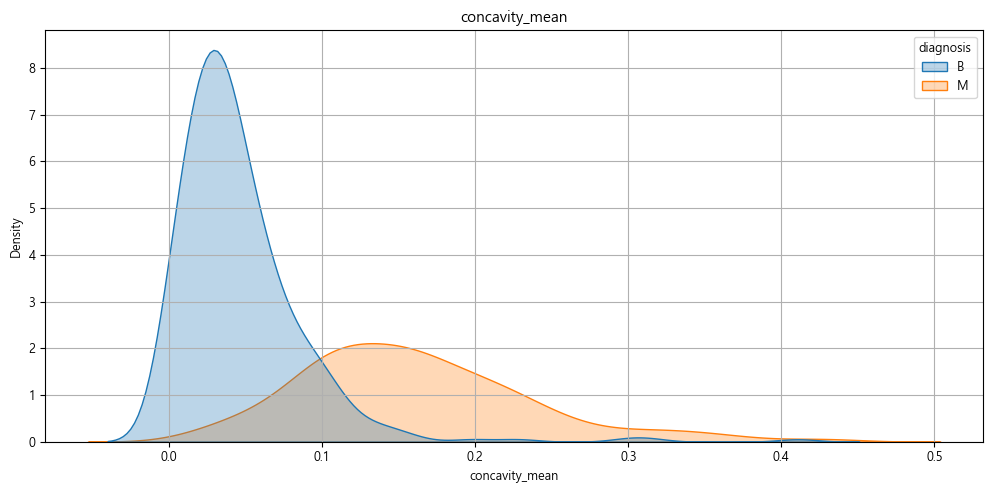

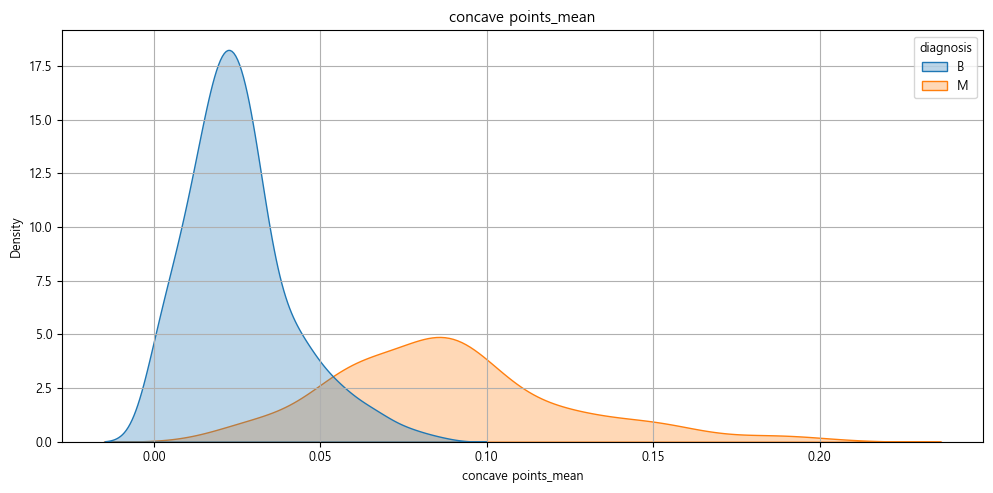

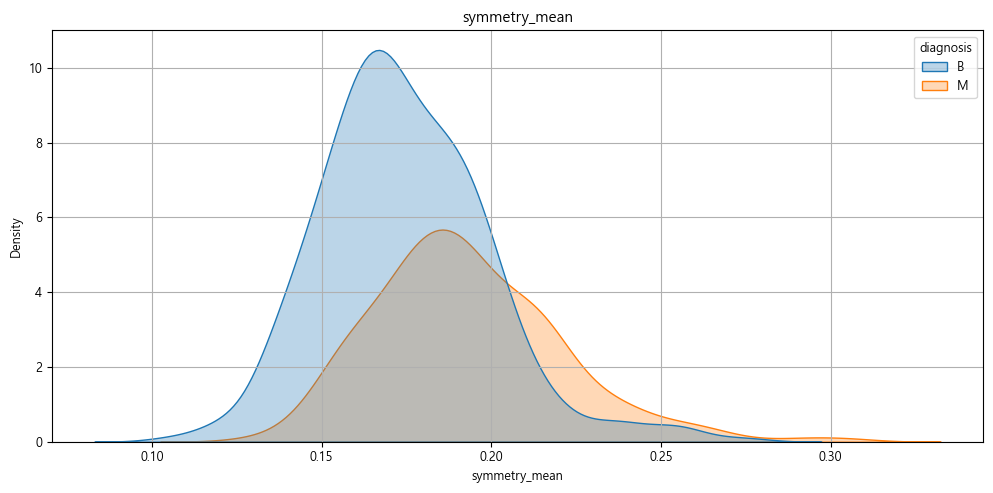

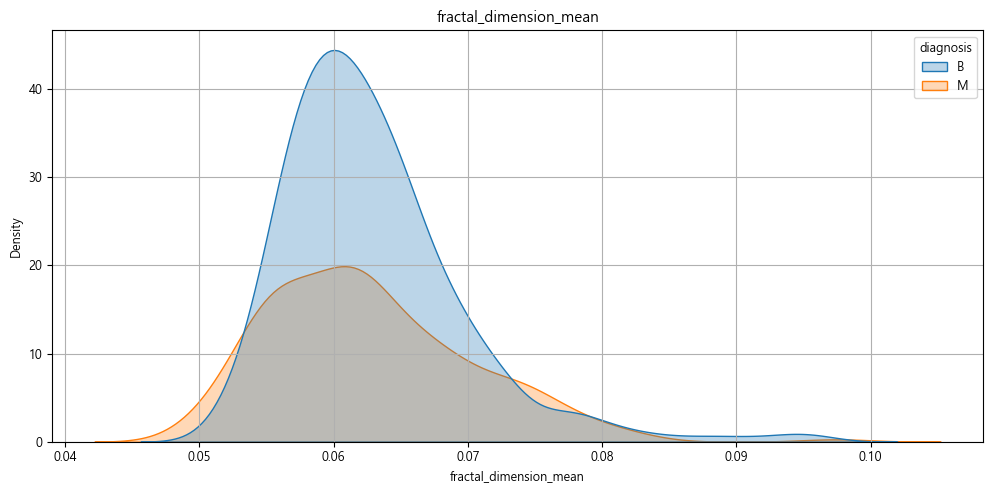

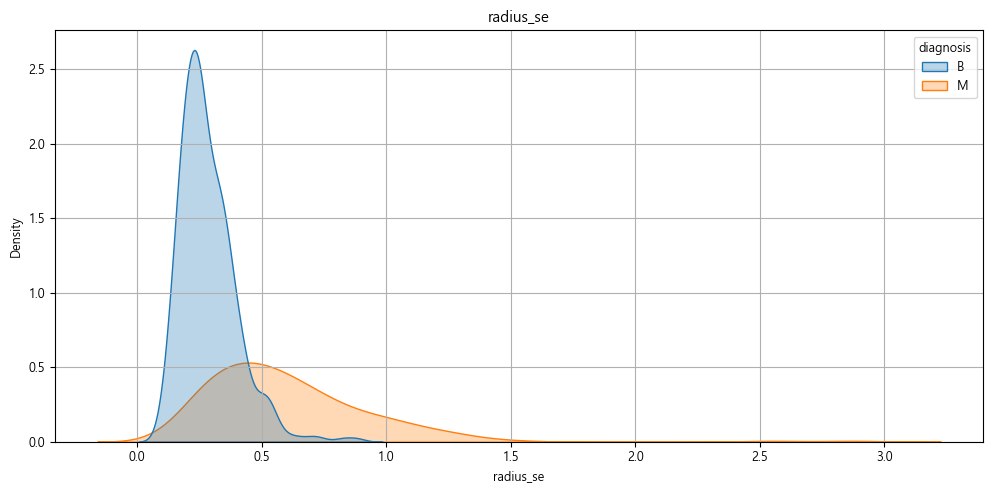

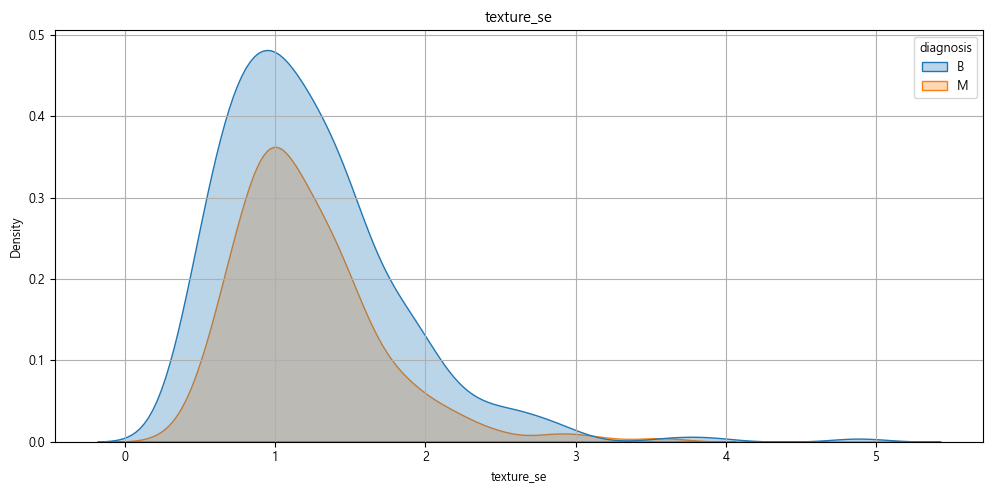

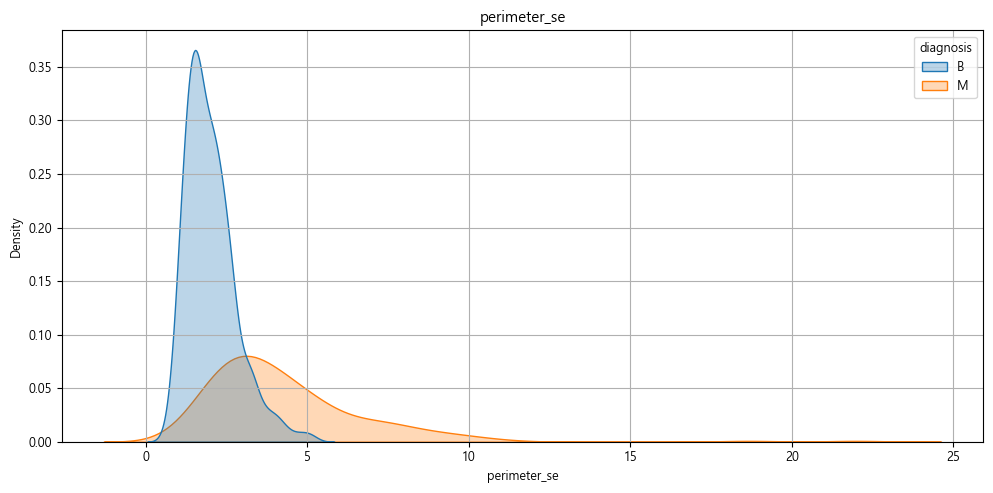

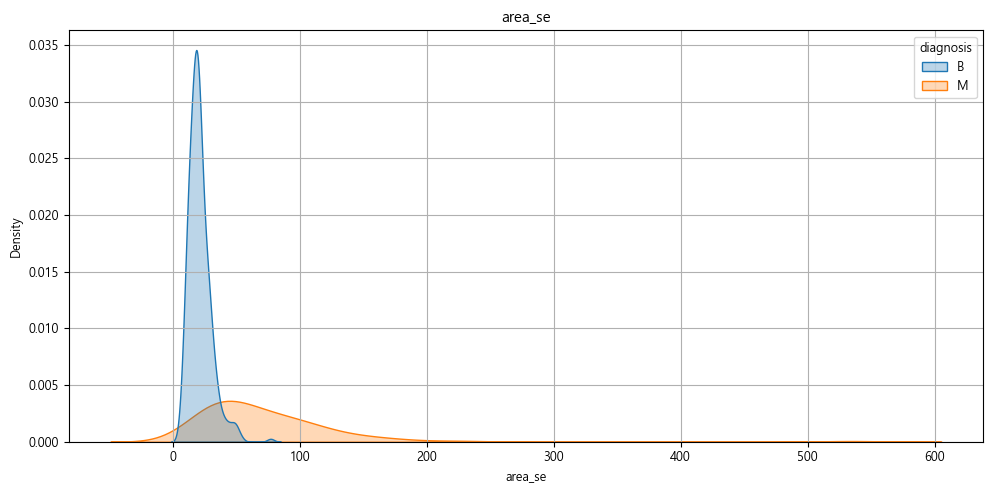

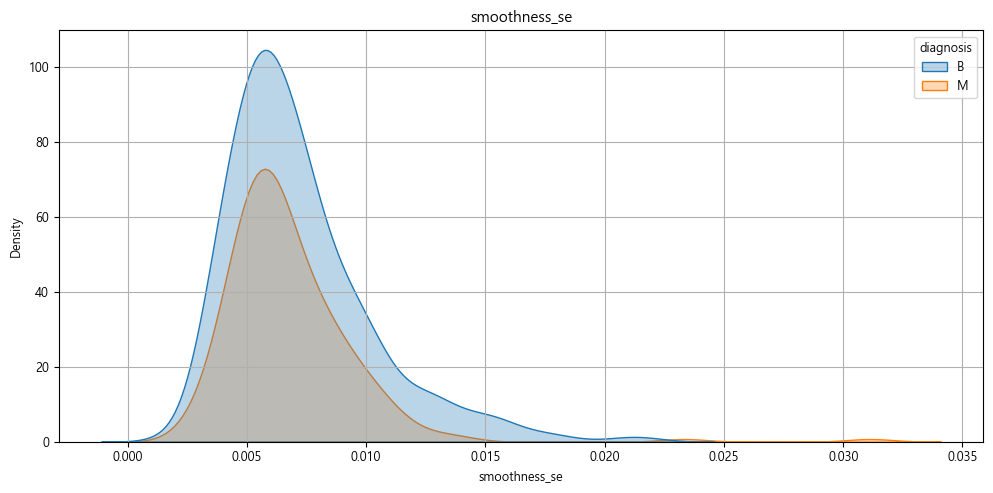

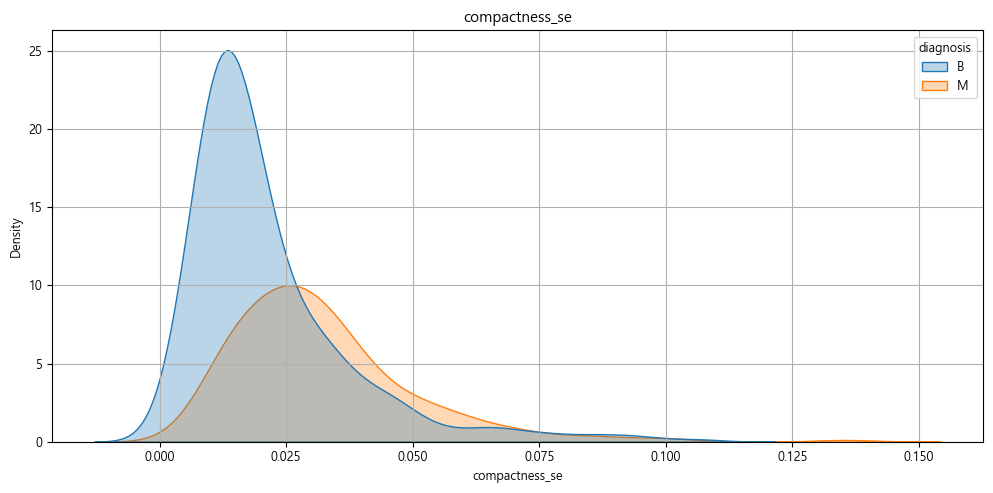

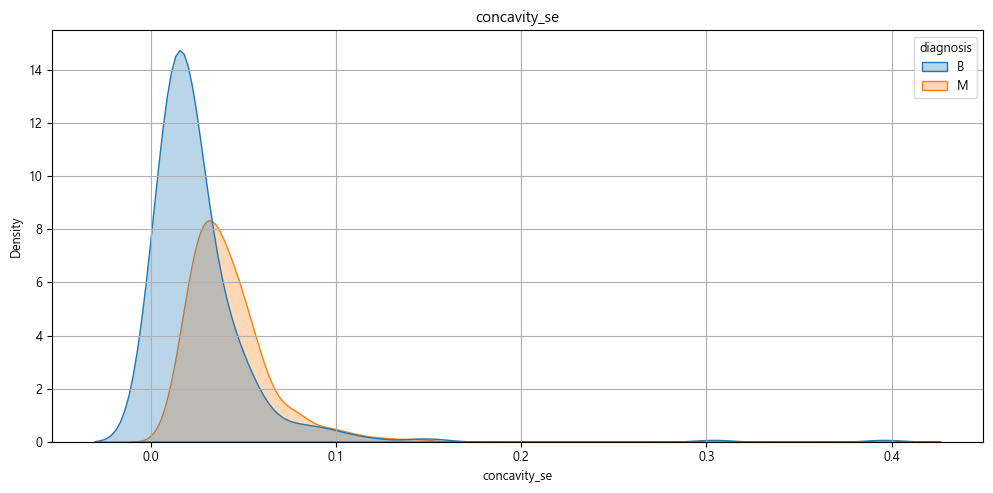

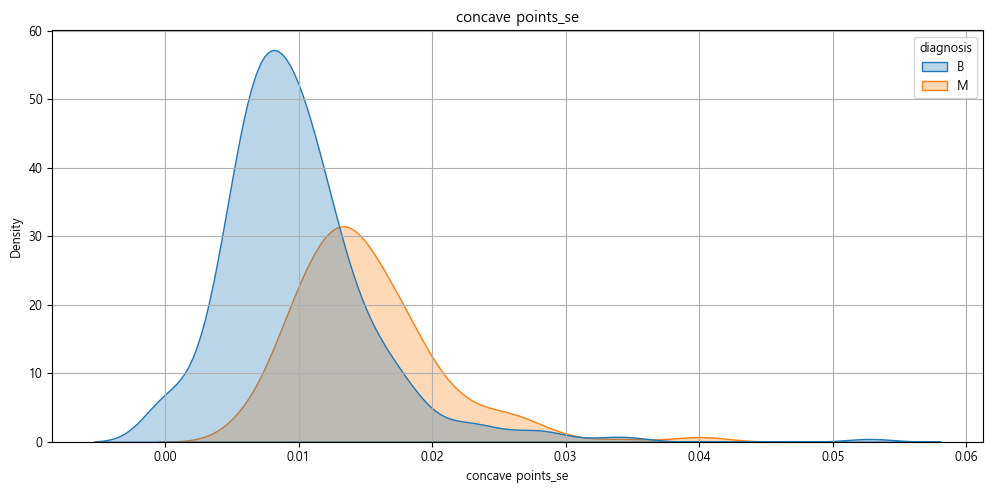

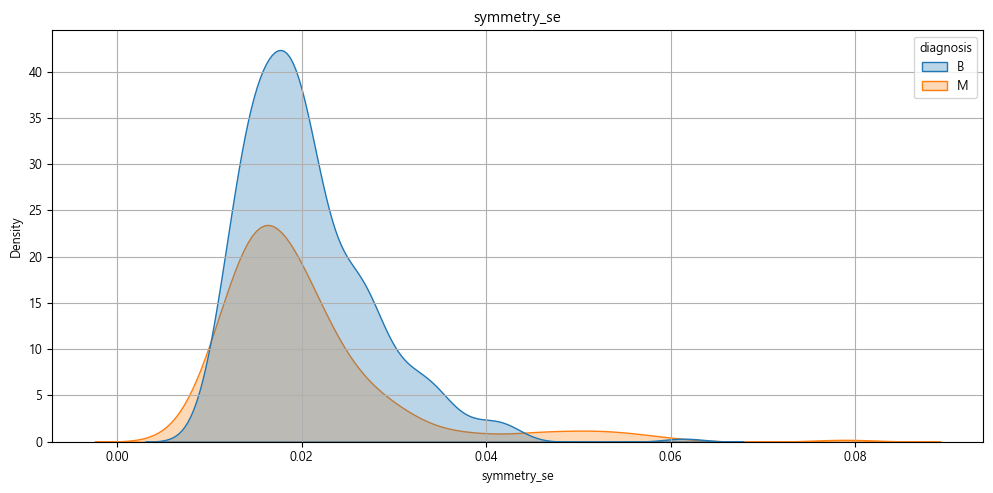

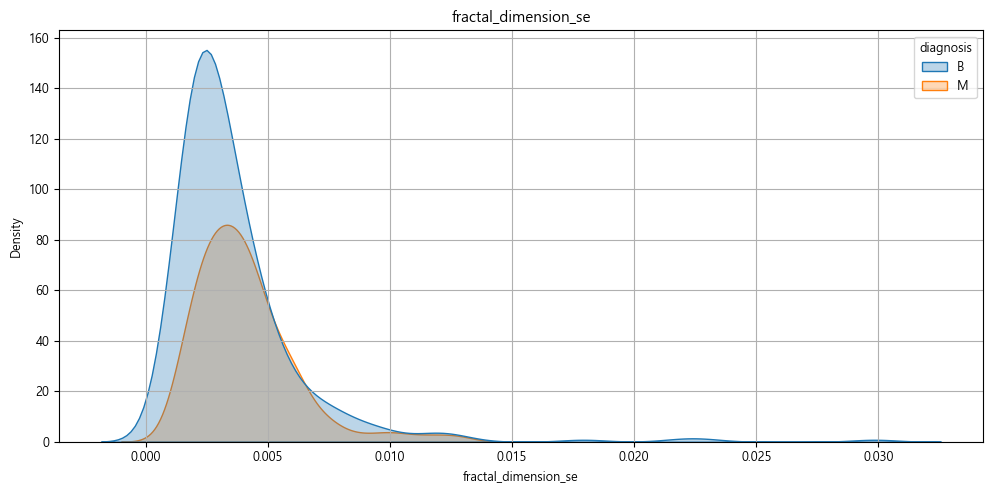

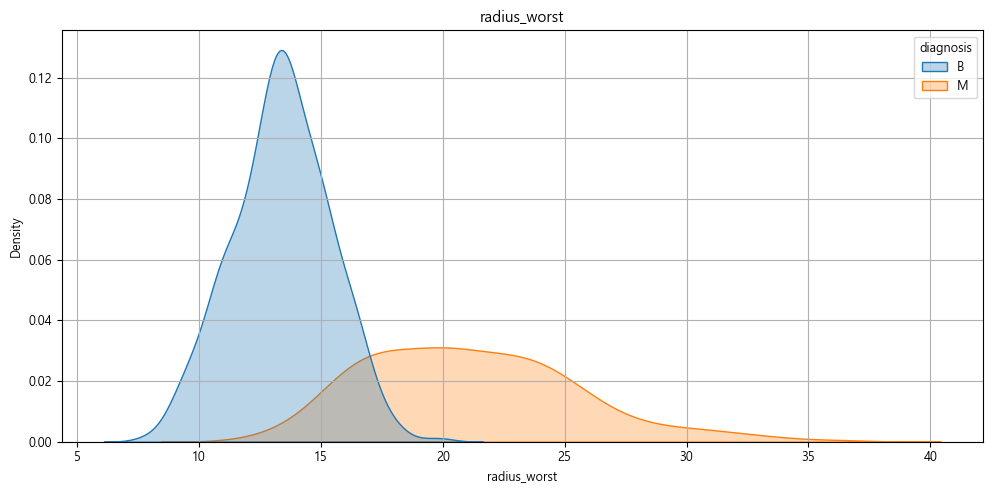

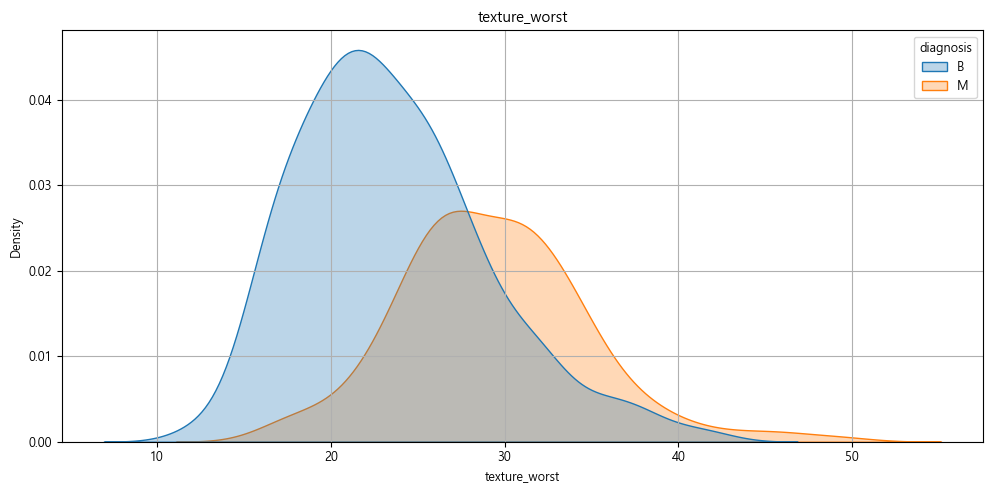

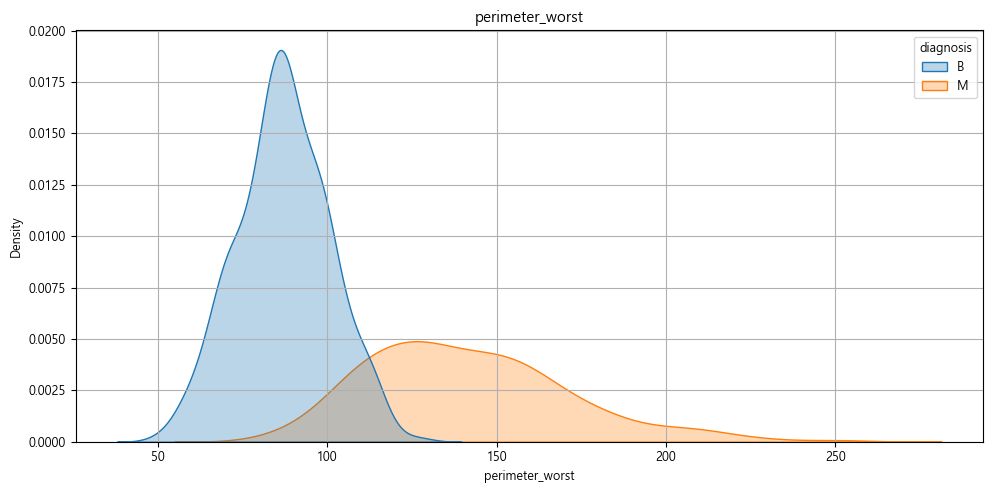

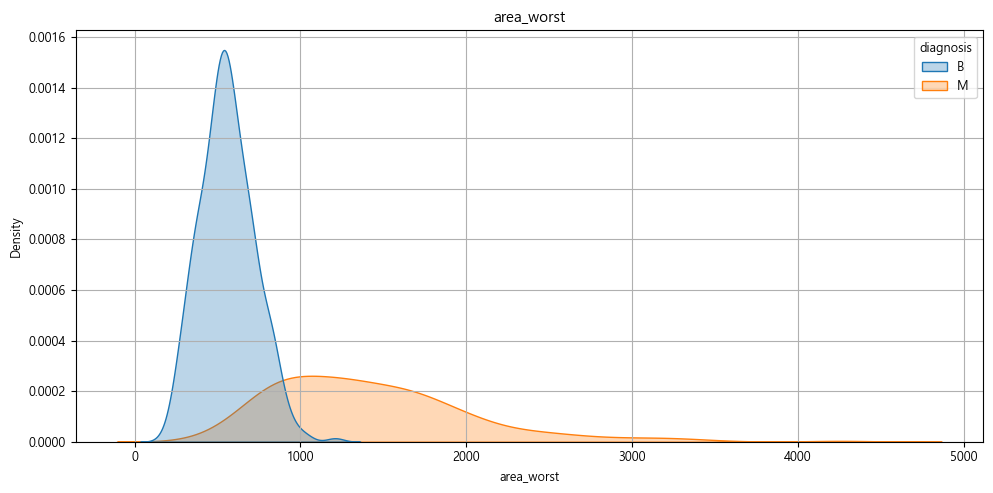

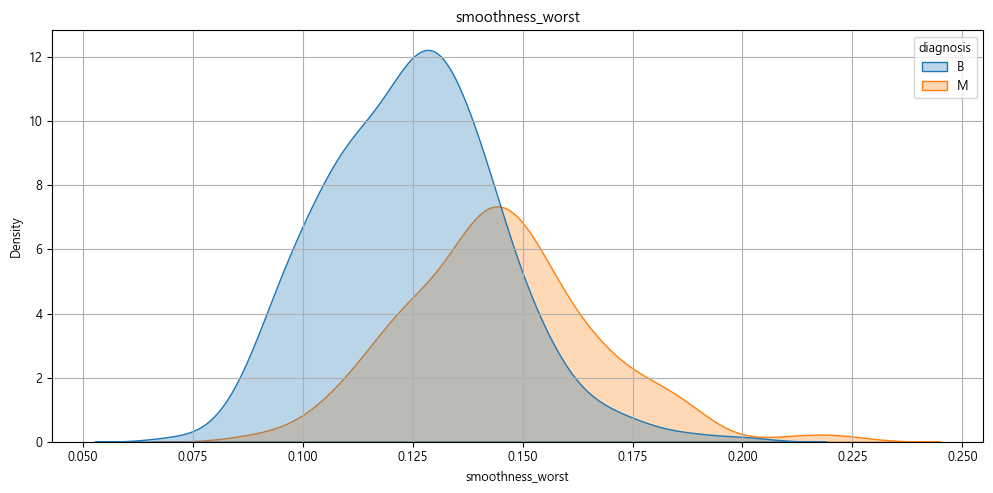

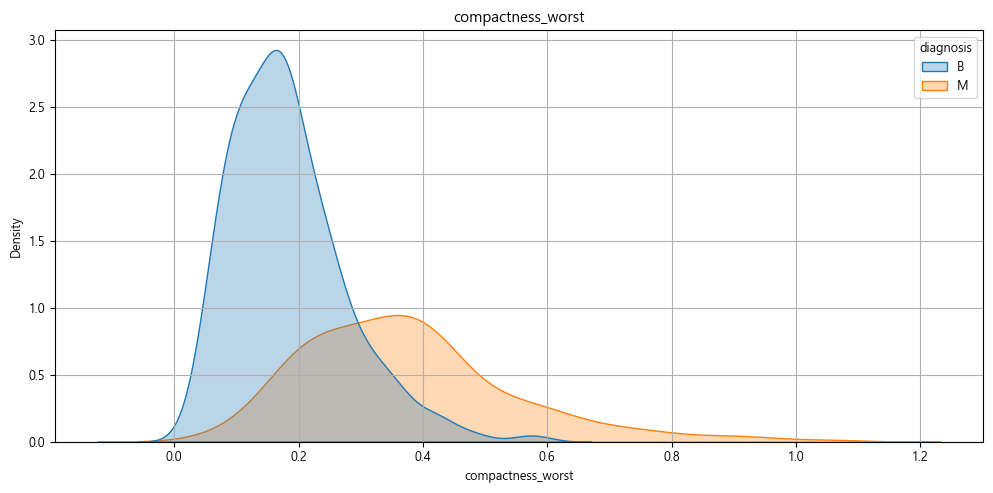

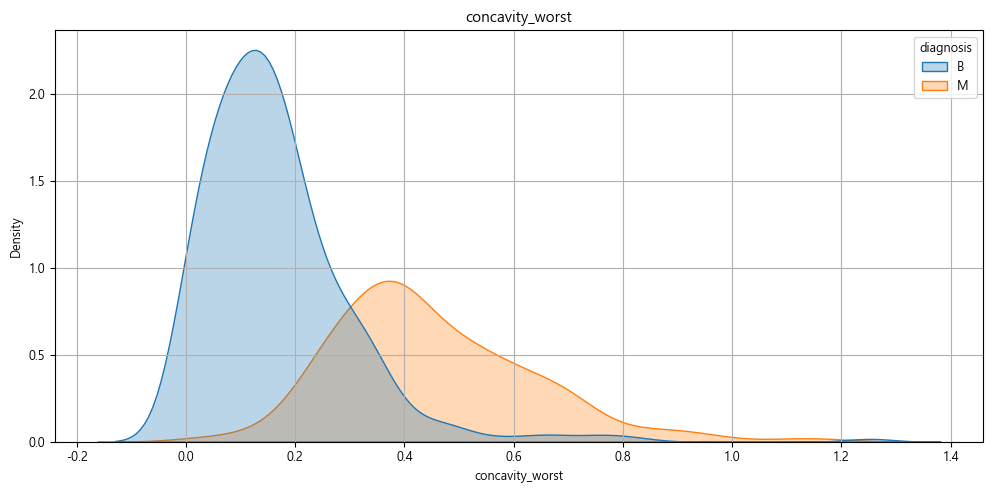

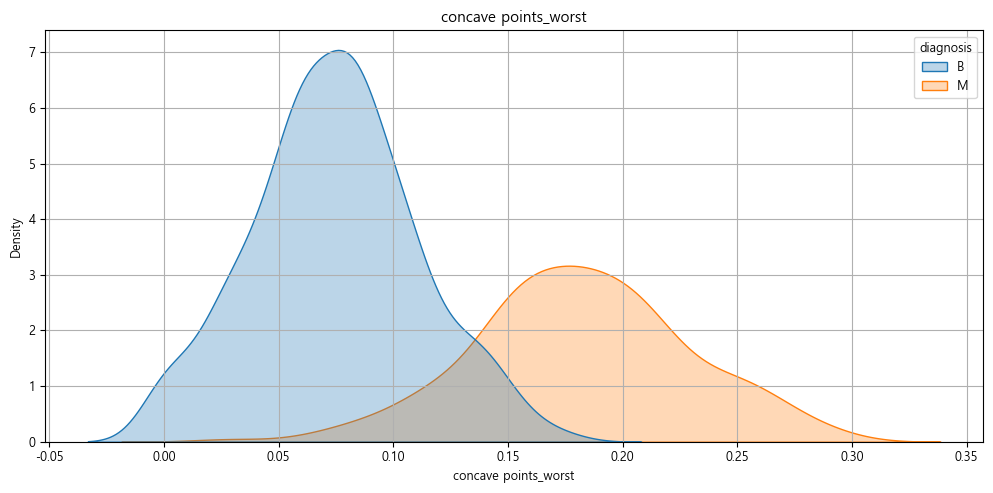

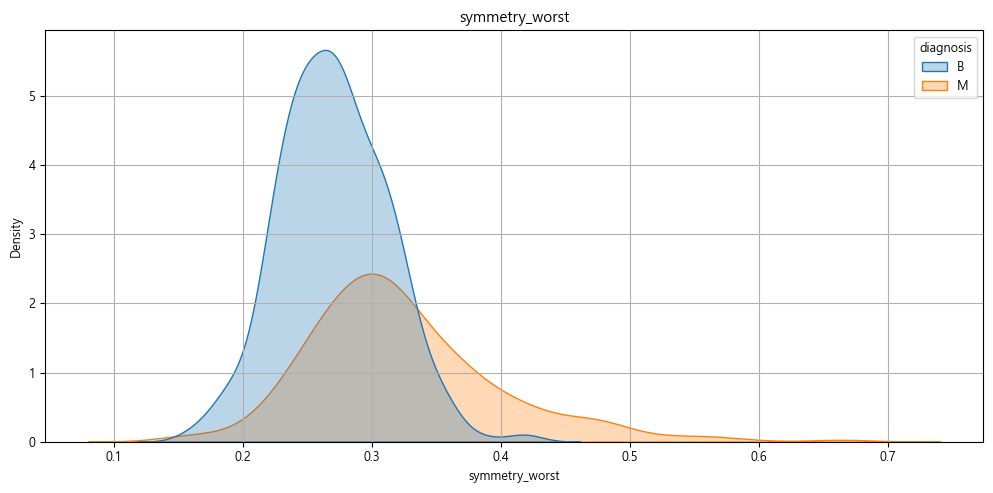

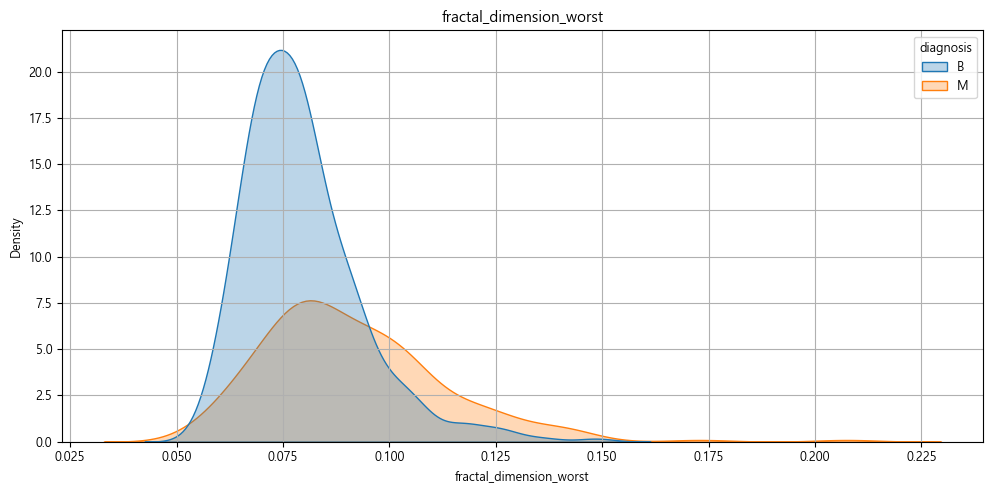

In [5]:
for x in xnames:
    if origin[x].dtype == 'category':
        my_stackplot(origin, xname=x, hue=yname, dpi=100, callback=lambda ax: ax.set_title(x))
    else:
        my_kdeplot(origin, xname=x, hue=yname, fill=True, dpi=100, callback=lambda ax: ax.set_title(x))

> 일부 변수에서 악성,양성에 따른 평균이 유의미한 차이가 없는 것으로 보이기는 하지만 일단 모든 변수를 다 투입하여 분석을 시도

## #03. 데이터 전처리

### [1] 스케일링

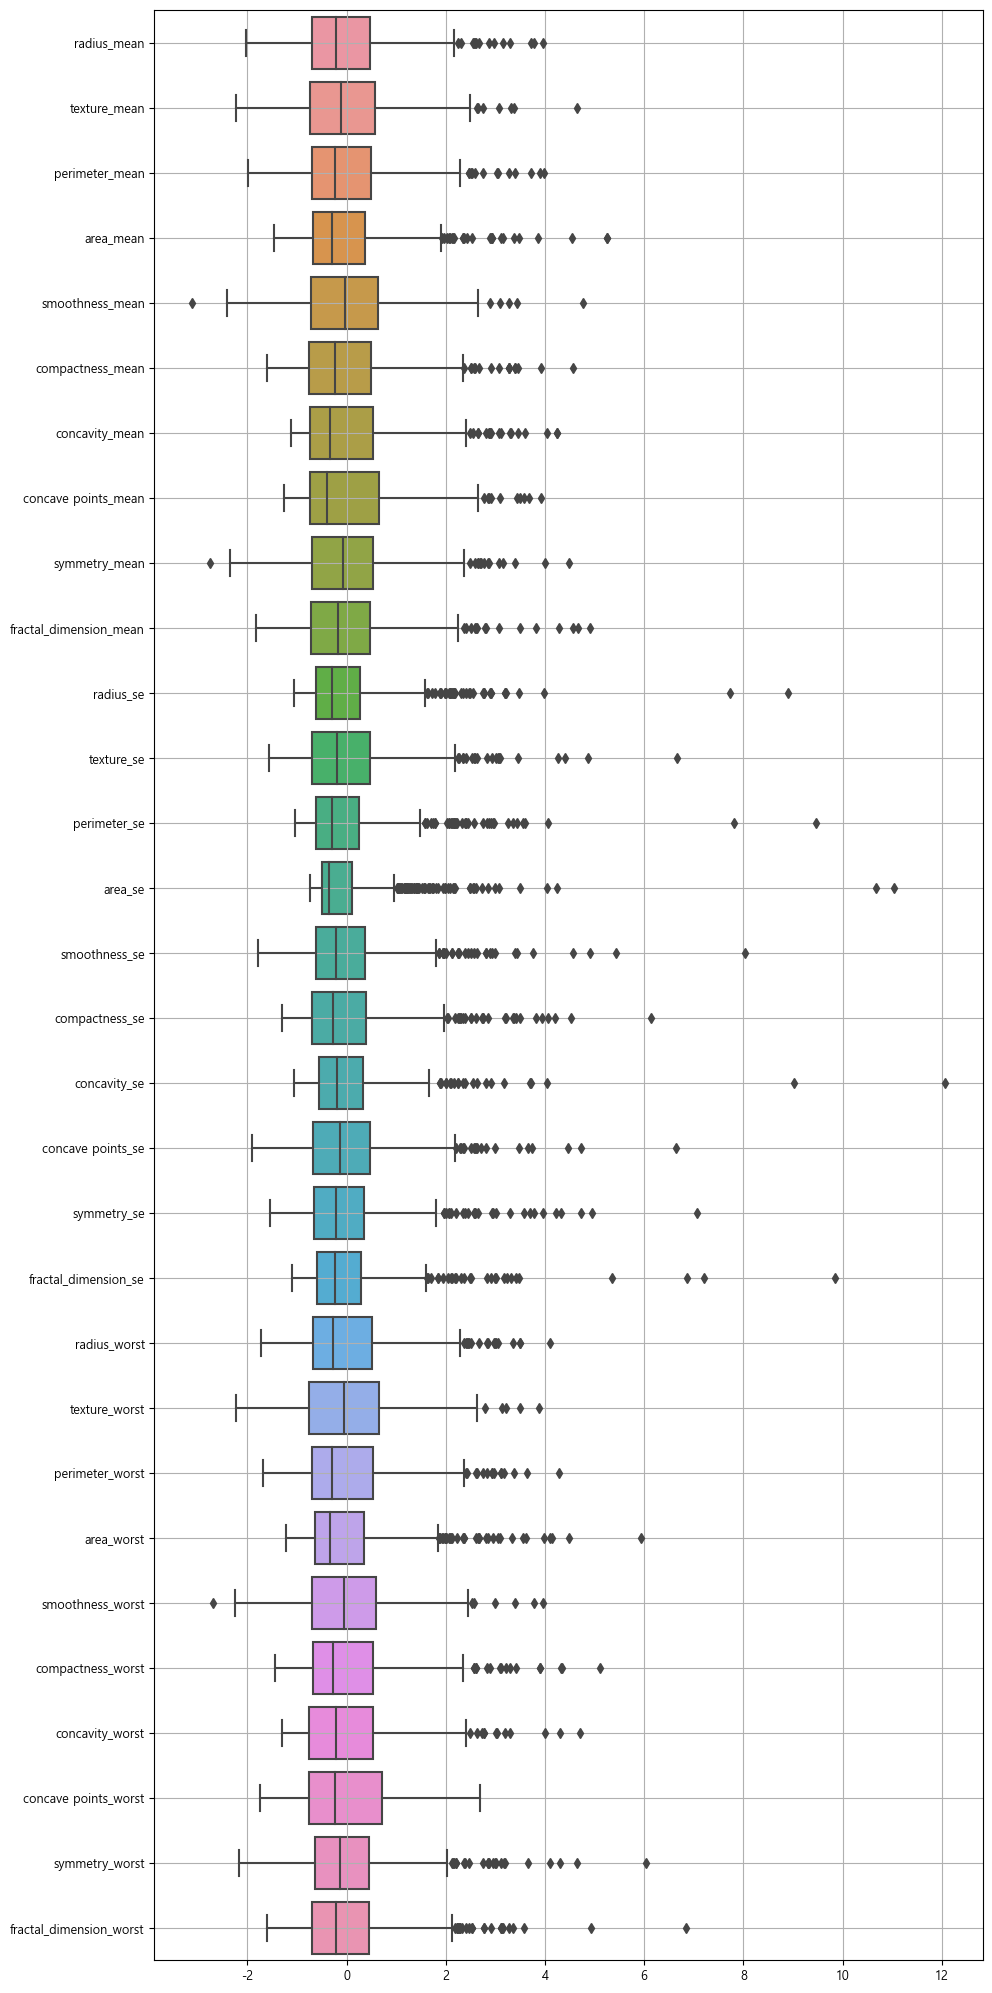

In [6]:
df = my_standard_scaler(origin, 'diagnosis')
my_boxplot(df, orient='h', figsize=(10, 20))



### [2] 종속변수 라벨링

`M`=악성=`1`, `B`=양성=`0`

In [7]:
df2 = my_labelling(df, 'diagnosis')
my_pretty_table(df2.head())

+----------+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+-------------+
|       id |   radius_mean |   texture_mean |   perimeter_mean |   area_mean |   smoothness_mean |   compactness_mean |   concavity_mean |   concave points_mean |   symmetry_mean |   fractal_dimension_mean |   radius_se |   texture_se |   perimeter_se |   area_se |   smoothness_se |   compactness_se |   concavity_se |   concave points_se |   symmetry_se |   fractal_dimension_se |   radius_worst 

## #03. 모든 데이터를 활용한 기본 분석 모형 구현

### [1] 데이터 분할

In [8]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, 'diagnosis')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### [2] 로지스틱 회귀

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.978022 |
| 10 |     1 | l2        |          0.978022 |
| 13 |    10 | l2        |          0.971429 |
| 16 |   100 | l2        |          0.967033 |
|  4 |  0.01 | l2        |          0.945055 |
|  1 | 0.001 | l2        |          0.883516 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.869719 |     0.859307 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.982418 |     0.982456 | 예측 결과(TN,FP,TP,TN)가 실제 결과

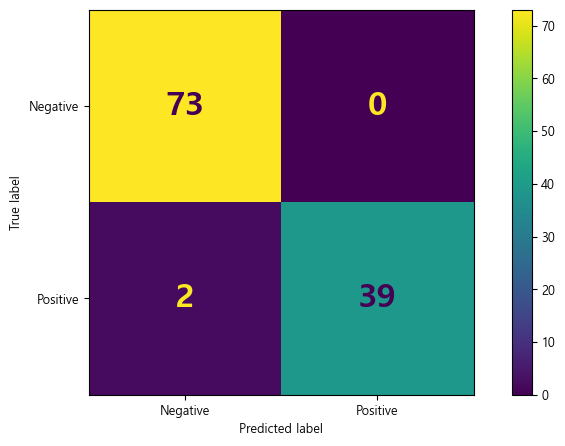


[ROC/PR Curve]


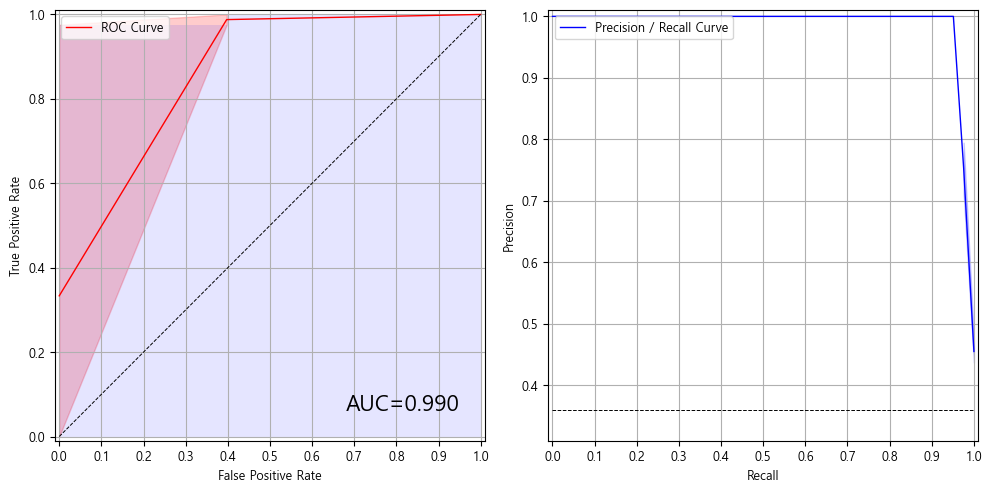


[학습곡선]


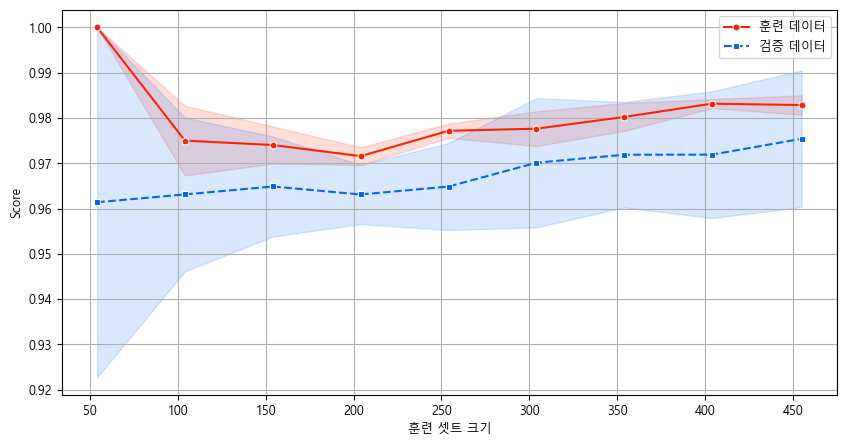

+----+------------+-------------------------+--------------------+------------+---------+------------+------------+
|    | 종속변수   | 독립변수                |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |   OddsRate |
|----+------------+-------------------------+--------------------+------------+---------+------------+------------|
|  0 | diagnosis  | radius_mean             |             0.3976 |     74.092 |  0.0054 |      0.996 |     1.4883 |
|  1 | diagnosis  | texture_mean            |             0.4098 |      3.177 |   0.129 |      0.897 |     1.5066 |
|  2 | diagnosis  | perimeter_mean          |             0.3861 |     73.769 |  0.0052 |      0.996 |     1.4712 |
|  3 | diagnosis  | area_mean               |             0.3794 |      29.39 |  0.0129 |       0.99 |     1.4614 |
|  4 | diagnosis  | smoothness_mean         |             0.1662 |      3.064 |  0.0542 |      0.957 |     1.1808 |
|  5 | diagnosis  | compactness_mean        |              0.034 |      7.844 |  0.0043 |     

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [9]:
my_logistic_classification(x_train, y_train, x_test, y_test)